<a href="https://colab.research.google.com/github/Peckkie/Experiment_Evaluation_CCA/blob/main/Graph_forPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
os.chdir( '/content/drive/MyDrive/CCA_Project')
!pwd

/content/drive/MyDrive/CCA_Project


# EffNet+RF model result 

In [9]:
import pandas as pd
RFdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Experiment2_AI.csv')
RFdf.head(3)

,Unnamed: 0,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,Class,Case,Abs Position,Sub_class,Path Full,fold,AI_Pred,U10_Pred,U11_Pred,tagName0,Sub_class_New,Top3_category,Top3_Prob,category,Prob,FP_category,U31_Pred_ass,U30_Pred,U41_Pred,U21_Pred,U40_Pred_ass,U20_Pred_ass,U10_Pred2_ass,U11_Pred2,U30_Pred2_ass,U41_Pred2_ass,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2_ass,B10_Pred1,B11_Pred1_ass,B12_Pred1_ass,B10_Pred2_ass,B11_Pred2,B12_Pred2
0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,100,P1,P1,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,2,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'AB082']","[0.5297411700821869, 0.20299334374021513, 0.07...",AB02,0.529741,FP-A,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,50,P4,P42,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'Normal']","[0.5384400113893146, 0.23439530764208472, 0.03...",AB02,0.538440,FP-B,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02,AB01,AB01,AB02,AB02,AB01,Normal
2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,4,P5,P52,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB01,AB03,AB02,Easy,AB01,"['AB01', 'Normal', 'AB082']","[0.8420314338368775, 0.03463969852508276, 0.02...",AB01,0.842031,FP-C,AB01,AB02,AB02,AB02,AB01,AB01,AB01,AB02,AB01,AB02,AB02,AB02,AB01,AB01,AB11,AB02,AB01,AB01,AB02,Normal


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib
# matplotlib.axes.Axes.annotate
# cm.round(decimals=2)

def confusion_matrix_normalized(cm,group):
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal'}
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.set()
    classes = np.array(['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal'])
    fig, ax = plt.subplots(figsize=(19, 11))
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 12}) #Blues,Oranges,Reds,YlGnBu
    ax.set(xticklabels=classes, yticklabels=classes)
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
    ax.set_title(f'Normalized confusion matrix  {group}',fontsize=32, fontdict=font, pad=25)
    ax.set_ylabel('True label',fontsize=27, fontdict=font, labelpad=15)
    ax.set_xlabel('Predicted label',fontsize=27, fontdict=font, labelpad=15)
   
    hfont = {'fontname':'serif'}
    plt.yticks(fontsize=16, **hfont)
    plt.xticks(fontsize=16, **hfont)
    # plt.cticks(fontsize=16, **hfont)

    return ax

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


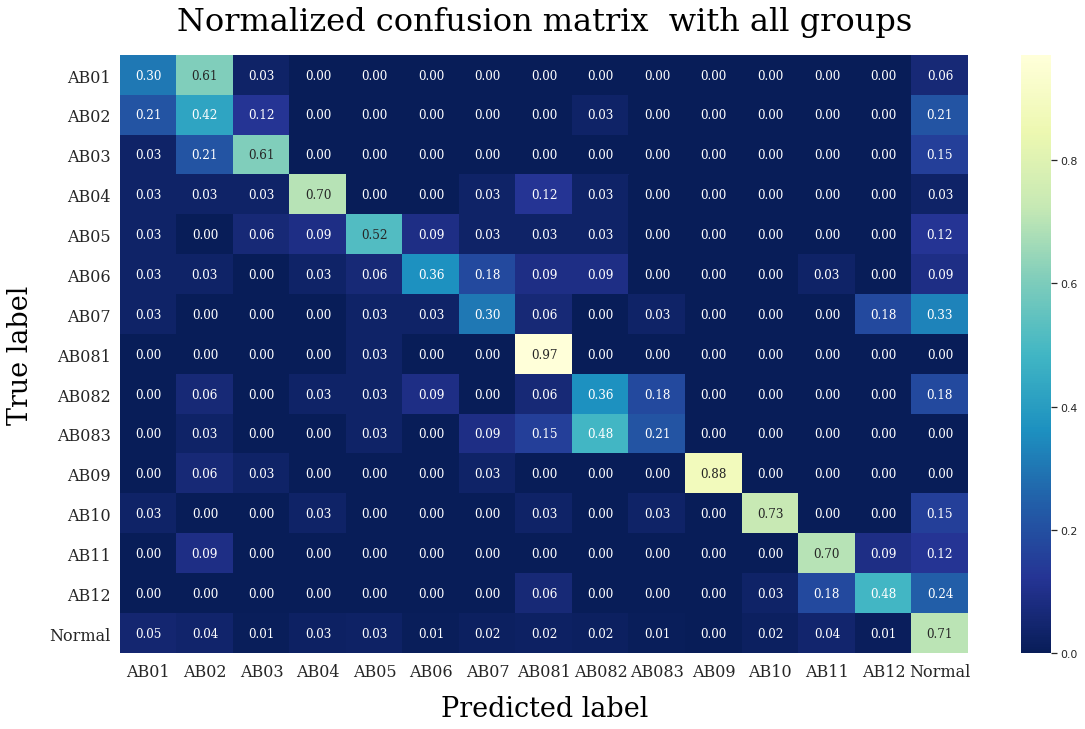

In [62]:
#Assisit tool GP
per =['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U10_Pred2_ass','U10_Pred','U20_Pred_ass','U21_Pred2_ass','U30_Pred2_ass','U31_Pred_ass','U40_Pred_ass','U41_Pred2_ass']
aa = list()
probmore=RFdf

for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]+df1.Con[8]+df1.Con[9]+df1.Con[10]
group = 'with all groups'
confusion_matrix_normalized(cm,group)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


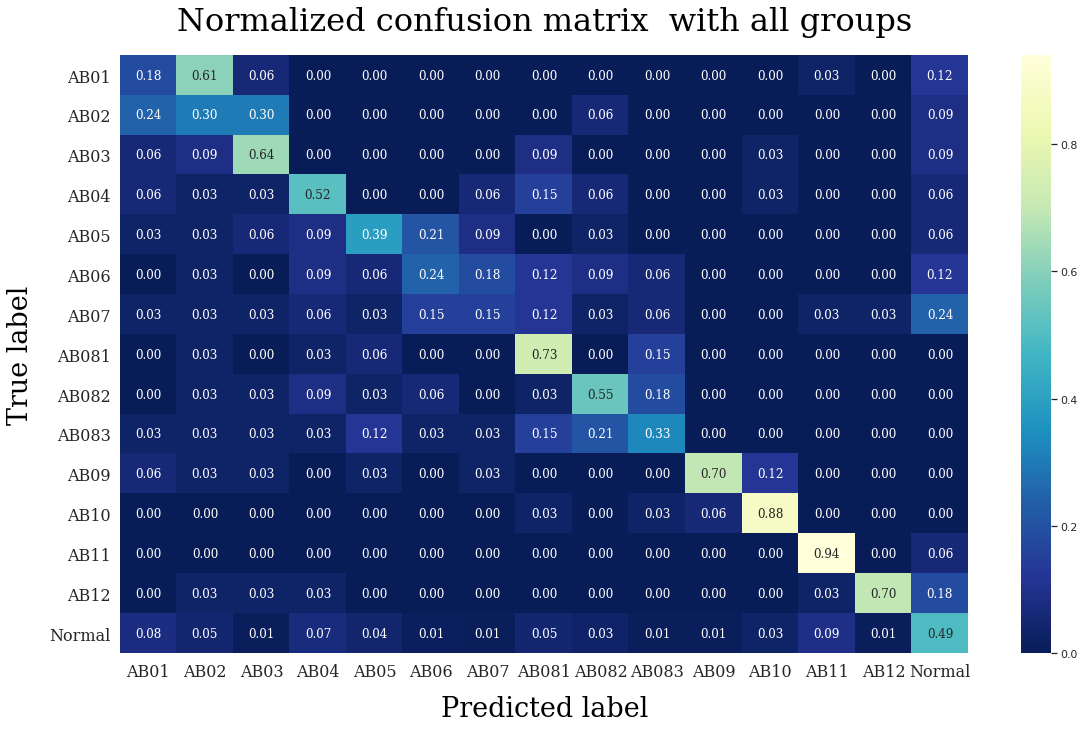

In [63]:
per =['U10_Pred', 'U11_Pred2', 'B10_Pred1', 'B11_Pred2', 'B12_Pred2','U20_Pred2', 'U21_Pred','U30_Pred', 'U31_Pred2','U40_Pred2', 'U41_Pred']
aa = list()
probmore=RFdf
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]+df1.Con[5]+df1.Con[6]+df1.Con[7]+df1.Con[8]+df1.Con[9]+df1.Con[10]

group = 'with all groups'
confusion_matrix_normalized(cm,group)

# Experiment result

In [66]:
import pandas as pd
RFdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Experiment2_AI.csv')
RFdf.head(3)

,Unnamed: 0,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,Class,Case,Abs Position,Sub_class,Path Full,fold,AI_Pred,U10_Pred,U11_Pred,tagName0,Sub_class_New,Top3_category,Top3_Prob,category,Prob,FP_category,U31_Pred_ass,U30_Pred,U41_Pred,U21_Pred,U40_Pred_ass,U20_Pred_ass,U10_Pred2_ass,U11_Pred2,U30_Pred2_ass,U41_Pred2_ass,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2_ass,B10_Pred1,B11_Pred1_ass,B12_Pred1_ass,B10_Pred2_ass,B11_Pred2,B12_Pred2
0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,100,P1,P1,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,2,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'AB082']","[0.5297411700821869, 0.20299334374021513, 0.07...",AB02,0.529741,FP-A,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,50,P4,P42,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'Normal']","[0.5384400113893146, 0.23439530764208472, 0.03...",AB02,0.538440,FP-B,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02,AB01,AB01,AB02,AB02,AB01,Normal
2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,4,P5,P52,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB01,AB03,AB02,Easy,AB01,"['AB01', 'Normal', 'AB082']","[0.8420314338368775, 0.03463969852508276, 0.02...",AB01,0.842031,FP-C,AB01,AB02,AB02,AB02,AB01,AB01,AB01,AB02,AB01,AB02,AB02,AB02,AB01,AB01,AB11,AB02,AB01,AB01,AB02,Normal


In [67]:
RFdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     150 non-null    int64  
 1   num            150 non-null    int64  
 2   FileName       150 non-null    object 
 3   sub_class      150 non-null    object 
 4   views          150 non-null    object 
 5   Path Crop      150 non-null    object 
 6   originalImage  150 non-null    object 
 7   tagName1       150 non-null    object 
 8   tagName2       150 non-null    object 
 9   Class          150 non-null    object 
 10  Case           150 non-null    int64  
 11  Abs Position   150 non-null    object 
 12  Sub_class      150 non-null    object 
 13  Path Full      150 non-null    object 
 14  fold           150 non-null    int64  
 15  AI_Pred        150 non-null    object 
 16  U10_Pred       150 non-null    object 
 17  U11_Pred       150 non-null    object 
 18  tagName0  

##  Confusion matrix by Best  Threshold


###  EffNet model

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
# def confusion_matrix_normalized(cm,group):
#     font = {'family': 'serif',
#             'color':  'black',
#             'weight': 'normal'}
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     sns.set()
#     classes = np.array(['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal'])
#     fig, ax = plt.subplots(figsize=(15, 11))
#     ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu_r") #Blues,Oranges,Reds,YlGnBu
#     ax.set(xticklabels=classes, yticklabels=classes)
#     plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
#     ax.set_title(f'Normalized confusion matrix with {group}',fontsize=18, fontdict=font, pad=15)
#     ax.set_ylabel('True label',fontsize=16, fontdict=font, labelpad=15)
#     ax.set_xlabel('Predicted label',fontsize=16, fontdict=font, labelpad=15)
#     return ax

In [69]:
def confusion_matrix_normalized(cm,group):
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal'}
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.set()
    classes = np.array(['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal'])
    fig, ax = plt.subplots(figsize=(19, 11))
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 12}) #Blues,Oranges,Reds,YlGnBu
    ax.set(xticklabels=classes, yticklabels=classes)
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
    ax.set_title(f'Normalized confusion matrix  {group}',fontsize=32, fontdict=font, pad=25)
    ax.set_ylabel('True label',fontsize=27, fontdict=font, labelpad=15)
    ax.set_xlabel('Predicted label',fontsize=27, fontdict=font, labelpad=15)
   
    hfont = {'fontname':'serif'}
    plt.yticks(fontsize=16, **hfont)
    plt.xticks(fontsize=16, **hfont)
    # plt.cticks(fontsize=16, **hfont)

    return ax

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
tn, fp, fn, tp =852,5, 96, 359
wl = (fp+tp)/(tp+tn+fp+fn)
1 - wl

0.7225609756097561

Text(0.5, 28.75, 'Predicted label')

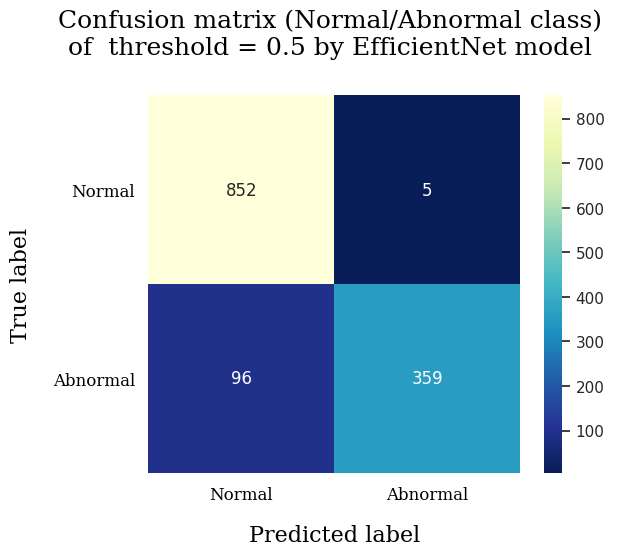

In [ ]:
cm = [[852,5], [96, 359]]

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['Normal','Abnormal'])
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu_r") #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
ax.set_xticklabels(classes,fontsize=12, fontdict=font)
ax.set_yticklabels(classes,fontsize=12, fontdict=font)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_title(f'Confusion matrix (Normal/Abnormal class) \n of  threshold = 0.5 by EfficientNet model  ',fontsize=18, fontdict=font, pad=30)
ax.set_ylabel('True label',fontsize=16, fontdict=font, labelpad=15)
ax.set_xlabel('Predicted label',fontsize=16, fontdict=font, labelpad=15)

In [ ]:
tn, fp, fn, tp = 844 , 13 , 54 , 401
wl = (fp+tp)/(tp+tn+fp+fn)
1 - wl

0.6844512195121951

Text(0.5, 28.75, 'Predicted label')

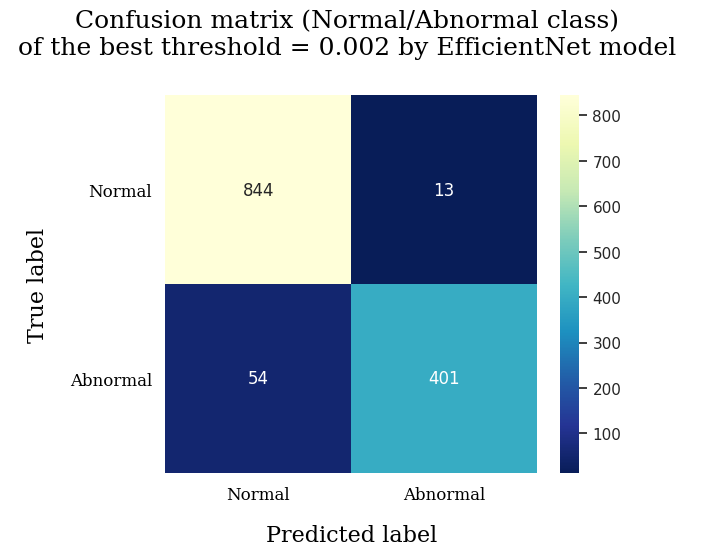

In [ ]:
cm = [ [844 , 13] , [54 , 401]]

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['Normal','Abnormal'])
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu_r") #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
ax.set_xticklabels(classes,fontsize=12, fontdict=font)
ax.set_yticklabels(classes,fontsize=12, fontdict=font)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_title(f'Confusion matrix (Normal/Abnormal class) \n of the best threshold = 0.002 by EfficientNet model  ',fontsize=18, fontdict=font, pad=30)
ax.set_ylabel('True label',fontsize=16, fontdict=font, labelpad=15)
ax.set_xlabel('Predicted label',fontsize=16, fontdict=font, labelpad=15)


### EffNet+Rf model

In [ ]:
tn, fp, fn, tp =823 , 34 , 36 , 419
wl = (fp+tp)/(tp+tn+fp+fn)
1 - wl

0.6547256097560976

Text(0.5, 28.75, 'Predicted label')

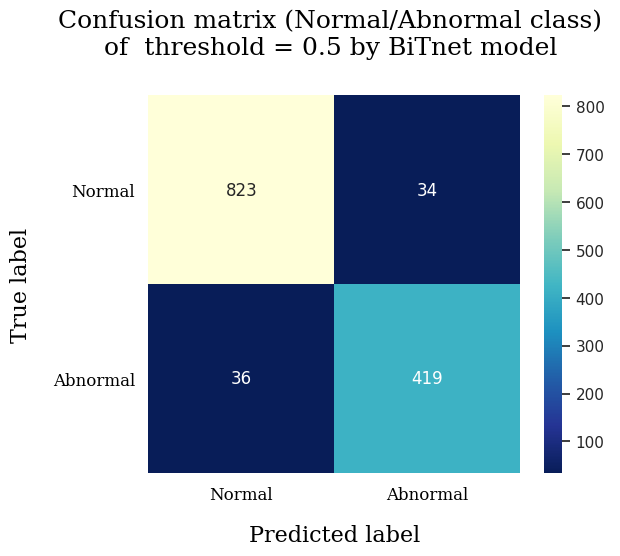

In [ ]:
cm = [[823 , 34] , [36 , 419]]

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['Normal','Abnormal'])
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu_r") #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
ax.set_xticklabels(classes,fontsize=12, fontdict=font)
ax.set_yticklabels(classes,fontsize=12, fontdict=font)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_title(f'Confusion matrix (Normal/Abnormal class) \n of  threshold = 0.5 by BiTnet model  ',fontsize=18, fontdict=font, pad=30)
ax.set_ylabel('True label',fontsize=16, fontdict=font, labelpad=15)
ax.set_xlabel('Predicted label',fontsize=16, fontdict=font, labelpad=15)

In [ ]:
tn, fp, fn, tp =460 , 397 ,1 , 454
wl = (fp+tp)/(tp+tn+fp+fn)
1 - wl

0.35137195121951215

Text(0.5, 28.75, 'Predicted label')

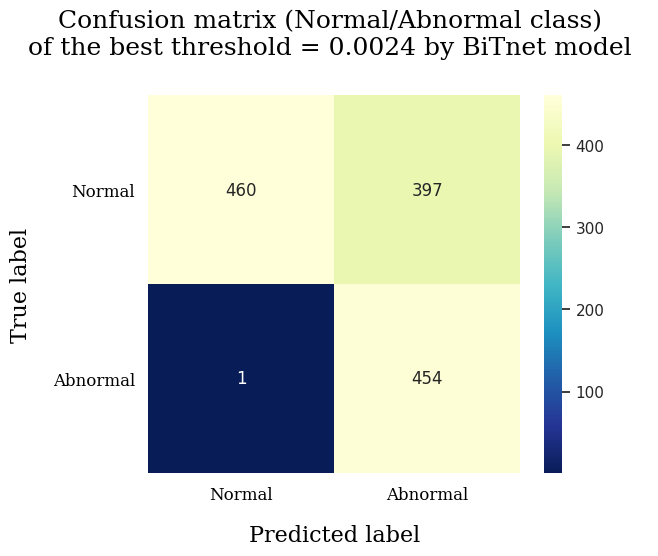

In [ ]:
cm = [[460 , 397] , [1 , 454]]

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['Normal','Abnormal'])
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu_r") #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
ax.set_xticklabels(classes,fontsize=12, fontdict=font)
ax.set_yticklabels(classes,fontsize=12, fontdict=font)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_title(f'Confusion matrix (Normal/Abnormal class) \n of the best threshold = 0.0024 by BiTnet model  ',fontsize=18, fontdict=font, pad=30)
ax.set_ylabel('True label',fontsize=16, fontdict=font, labelpad=15)
ax.set_xlabel('Predicted label',fontsize=16, fontdict=font, labelpad=15)

## สร้าง confusion matrix เเยกตามกลุ่มคุณหมอ 
(ข้อมูลเเยกตามเเต่ล่ะกลุ่มของคุณหมอ)

In [20]:
import pandas as pd
Exdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Experiment2_AI.csv')
Exdf.head(3)

,Unnamed: 0,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,Class,Case,Abs Position,Sub_class,Path Full,fold,AI_Pred,U10_Pred,U11_Pred,tagName0,Sub_class_New,Top3_category,Top3_Prob,category,Prob,FP_category,U31_Pred_ass,U30_Pred,U41_Pred,U21_Pred,U40_Pred_ass,U20_Pred_ass,U10_Pred2_ass,U11_Pred2,U30_Pred2_ass,U41_Pred2_ass,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2_ass,B10_Pred1,B11_Pred1_ass,B12_Pred1_ass,B10_Pred2_ass,B11_Pred2,B12_Pred2
0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,100,P1,P1,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,2,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'AB082']","[0.5297411700821869, 0.20299334374021513, 0.07...",AB02,0.529741,FP-A,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,50,P4,P42,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'Normal']","[0.5384400113893146, 0.23439530764208472, 0.03...",AB02,0.538440,FP-B,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02,AB01,AB01,AB02,AB02,AB01,Normal
2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,4,P5,P52,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB01,AB03,AB02,Easy,AB01,"['AB01', 'Normal', 'AB082']","[0.8420314338368775, 0.03463969852508276, 0.02...",AB01,0.842031,FP-C,AB01,AB02,AB02,AB02,AB01,AB01,AB01,AB02,AB01,AB02,AB02,AB02,AB01,AB01,AB11,AB02,AB01,AB01,AB02,Normal


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# def confusion_matrix_normalized(cm,group):
#     font = {'family': 'serif',
#             'color':  'black',
#             'weight': 'normal'}
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     sns.set()
#     classes = np.array(['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal'])
#     fig, ax = plt.subplots(figsize=(15, 11))
#     ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu_r") #Blues,Oranges,Reds,YlGnBu
#     ax.set(xticklabels=classes, yticklabels=classes)
#     plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
#     ax.set_title(f'Normalized confusion matrix with {group}',fontsize=18, fontdict=font, pad=15)
#     ax.set_ylabel('True label',fontsize=16, fontdict=font, labelpad=15)
#     ax.set_xlabel('Predicted label',fontsize=16, fontdict=font, labelpad=15)
#     return ax

In [73]:
# def confusion_matrix_normalized(cm,group):
#     font = {'family': 'serif',
#             'color':  'black',
#             'weight': 'normal'}
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     sns.set()
#     classes = np.array(['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal'])
#     fig, ax = plt.subplots(figsize=(19, 11))
#     ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 12}) #Blues,Oranges,Reds,YlGnBu
#     ax.set(xticklabels=classes, yticklabels=classes)
#     plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
#     ax.set_title(f'Normalized confusion matrix  {group}',fontsize=32, fontdict=font, pad=25)
#     ax.set_ylabel('True label',fontsize=27, fontdict=font, labelpad=15)
#     ax.set_xlabel('Predicted label',fontsize=27, fontdict=font, labelpad=15)
   
#     hfont = {'fontname':'serif'}
#     plt.yticks(fontsize=16, **hfont)
#     plt.xticks(fontsize=16, **hfont)
#     # plt.cticks(fontsize=16, **hfont)

#     return ax

In [22]:
def confusion_matrix_normalized(cm,group):
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal'}
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.set()
    classes = np.array(['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal'])
    fig, ax = plt.subplots(figsize=(19, 11))
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 12}) #Blues,Oranges,Reds,YlGnBu
    ax.set(xticklabels=classes, yticklabels=classes)
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
    ax.set_title(f'Normalized confusion matrix  {group}',fontsize=32, fontdict=font, pad=25)
    ax.set_ylabel('True label',fontsize=27, fontdict=font, labelpad=15)
    ax.set_xlabel('Predicted label',fontsize=27, fontdict=font, labelpad=15)
   
    hfont = {'fontname':'serif'}
    plt.yticks(fontsize=16, **hfont)
    plt.xticks(fontsize=16, **hfont)
    # plt.cticks(fontsize=16, **hfont)

    return ax

### GP group

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


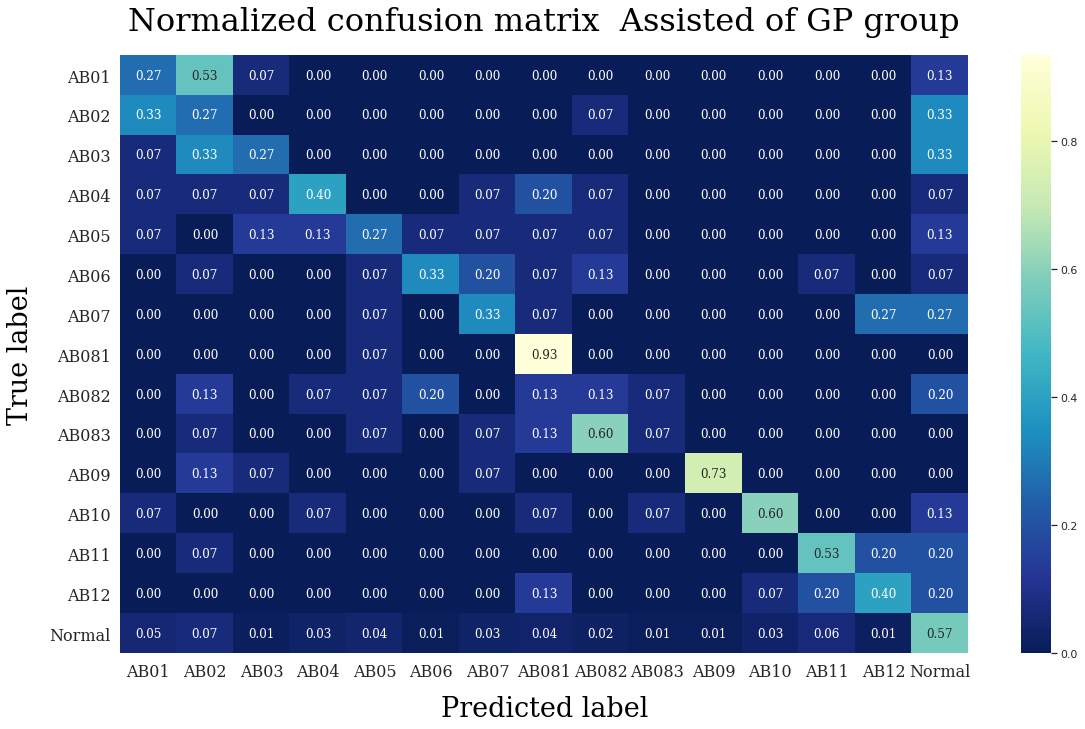

In [75]:
#Assisit tool GP
per = ['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U10_Pred2_ass','U10_Pred']
aa = list()
probmore=Exdf
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]
# print(sum(cm.ravel()))
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(10, 7))
# ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix of GP group ',fontsize=18)
# ax.set_ylabel('True label',fontsize=14)
# ax.set_xlabel('Predicted label',fontsize=14)

group = 'Assisted of GP group'
confusion_matrix_normalized(cm,group)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


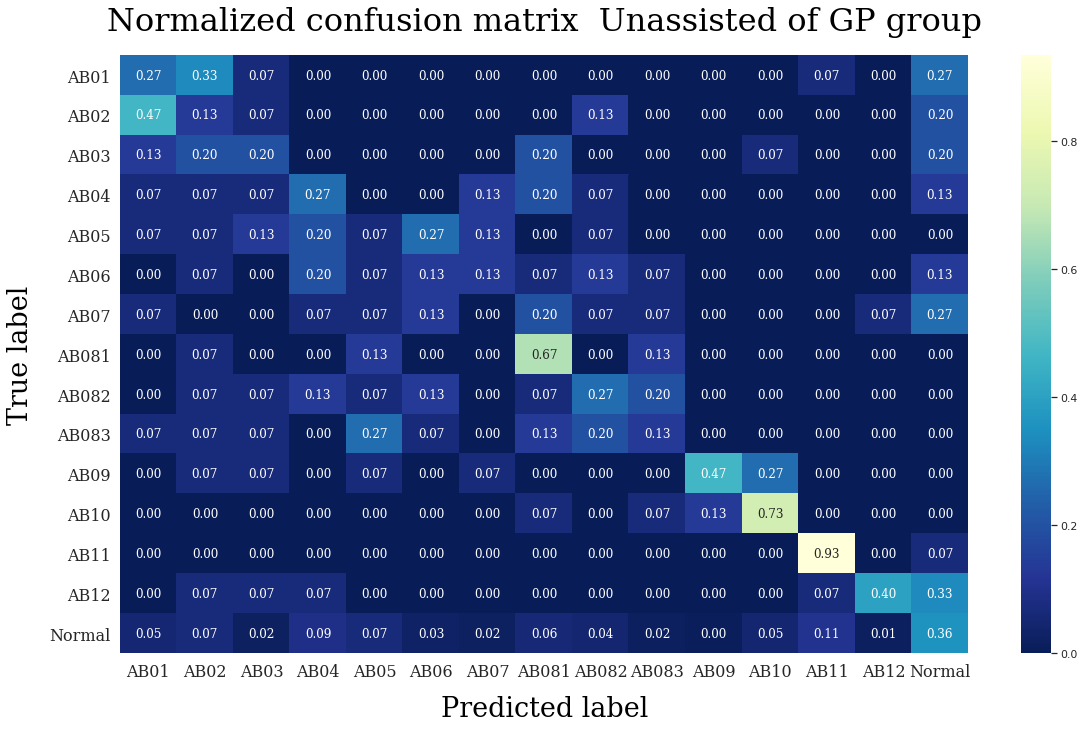

In [76]:
#Unassisit tool GP
per = ['U10_Pred', 'U11_Pred2', 'B10_Pred1', 'B11_Pred2', 'B12_Pred2']
aa = list()
probmore=Exdf
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]+df1.Con[2]+df1.Con[3]+df1.Con[4]
# print(sum(cm.ravel()))
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(10, 7))
# ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix of GP group ',fontsize=18)
# ax.set_ylabel('True label',fontsize=14)
# ax.set_xlabel('Predicted label',fontsize=14)

group = 'Unassisted of GP group'
confusion_matrix_normalized(cm,group)

### Res group

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


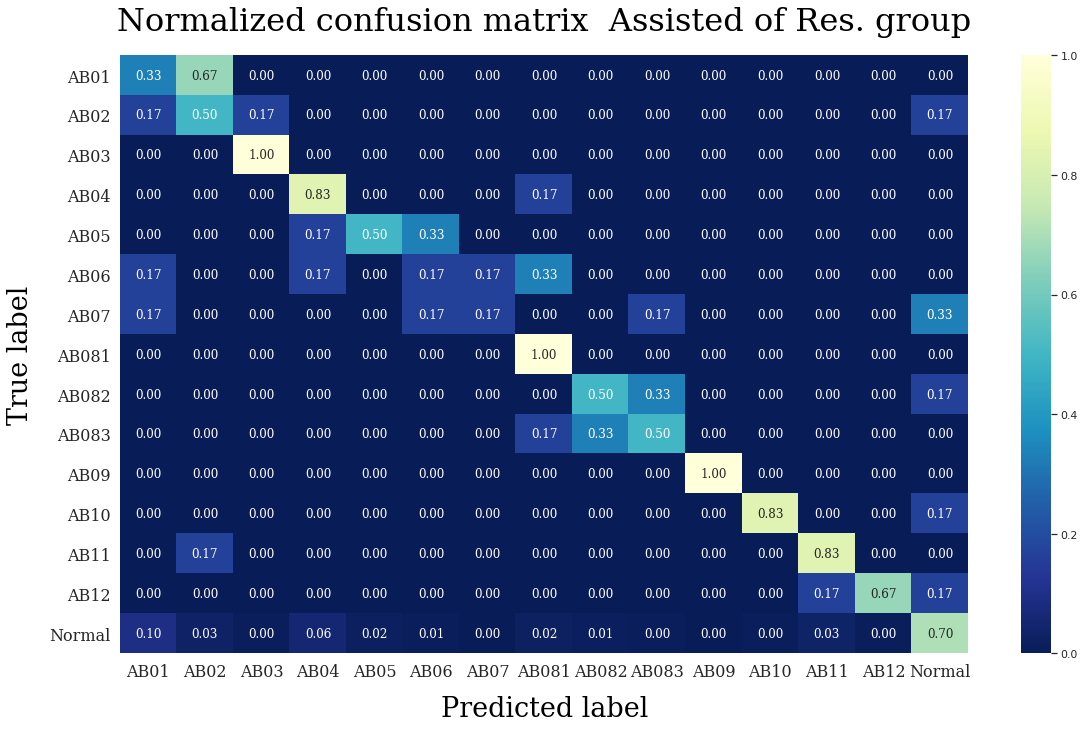

In [23]:
#Assisit tool Res
per = ['U20_Pred_ass','U21_Pred2_ass']
aa = list()
probmore=Exdf
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]
# print(sum(cm.ravel()))
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(10, 7))
# ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix of Res group ',fontsize=18)
# ax.set_ylabel('True label',fontsize=14)
# ax.set_xlabel('Predicted label',fontsize=14)

group = 'Assisted of Res. group'
confusion_matrix_normalized(cm,group)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


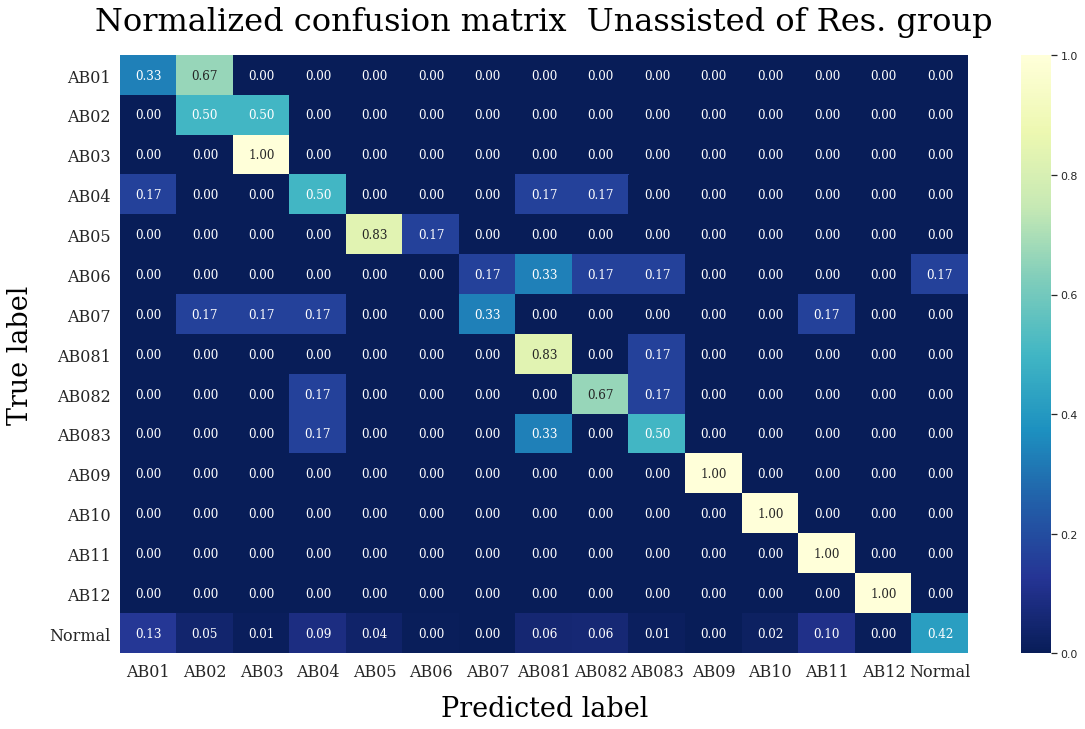

In [24]:
#Unassisit tool GP
per = ['U20_Pred2', 'U21_Pred']
aa = list()
probmore=Exdf
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]
# print(sum(cm.ravel()))
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(10, 7))
# ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix of Res group ',fontsize=18)
# ax.set_ylabel('True label',fontsize=14)
# ax.set_xlabel('Predicted label',fontsize=14)

group = 'Unassisted of Res. group'
confusion_matrix_normalized(cm,group)

### Non-HB group

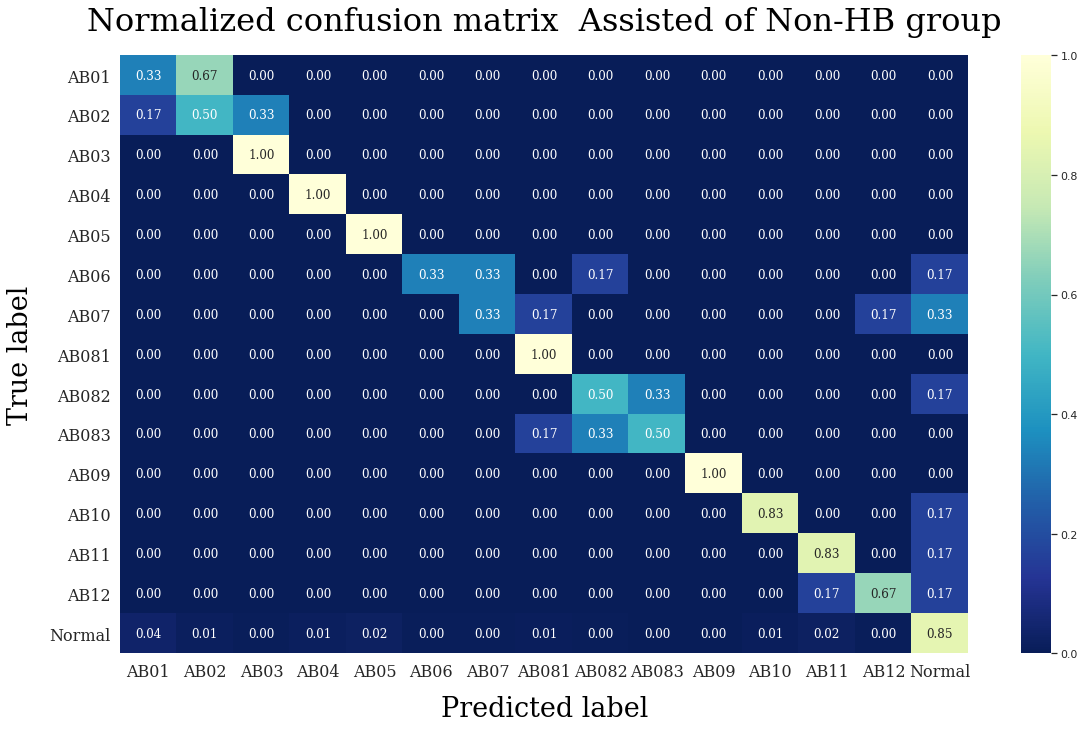

In [25]:
#Assisit tool Non-HB
per = ['U30_Pred2_ass','U31_Pred_ass']
aa = list()
probmore=Exdf
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]
# print(sum(cm.ravel()))
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(10, 7))
# ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix of Non-HB group ',fontsize=18)
# ax.set_ylabel('True label',fontsize=14)
# ax.set_xlabel('Predicted label',fontsize=14)

group = 'Assisted of Non-HB group'
confusion_matrix_normalized(cm,group)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


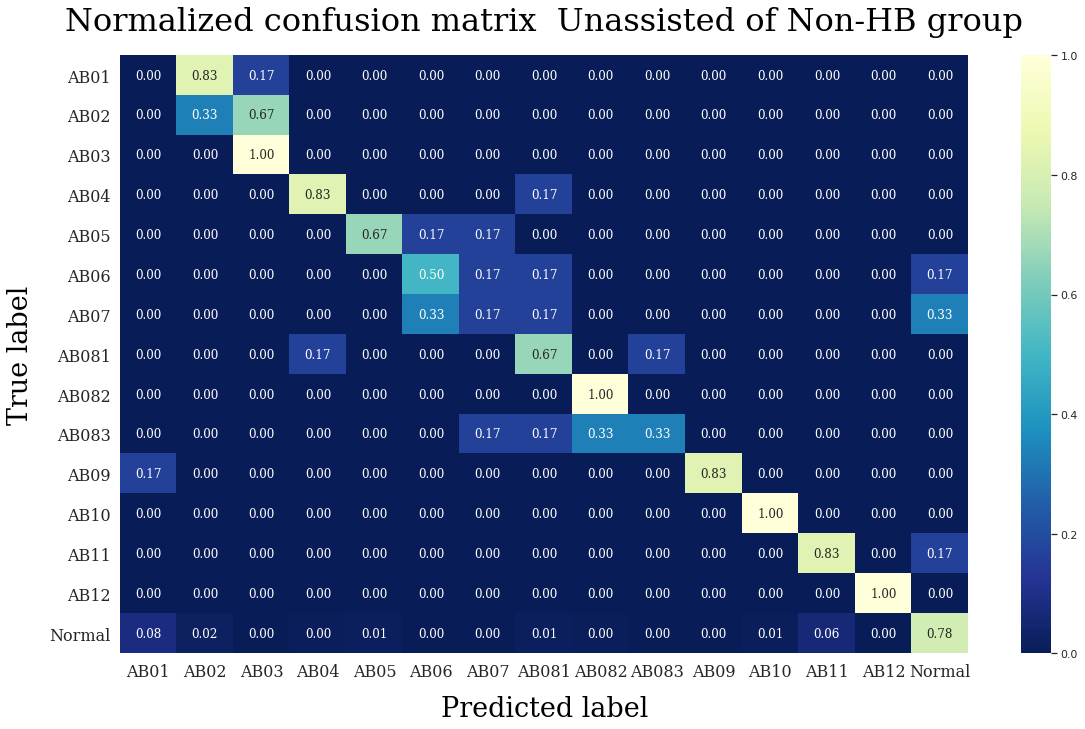

In [26]:
#Unassisit tool Non-HB
per = ['U30_Pred', 'U31_Pred2']
aa = list()
probmore=Exdf
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]
# print(sum(cm.ravel()))
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(10, 7))
# ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix of Non-HB group ',fontsize=18)
# ax.set_ylabel('True label',fontsize=14)
# ax.set_xlabel('Predicted label',fontsize=14)

group = 'Unassisted of Non-HB group'
confusion_matrix_normalized(cm,group)

### HB group

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


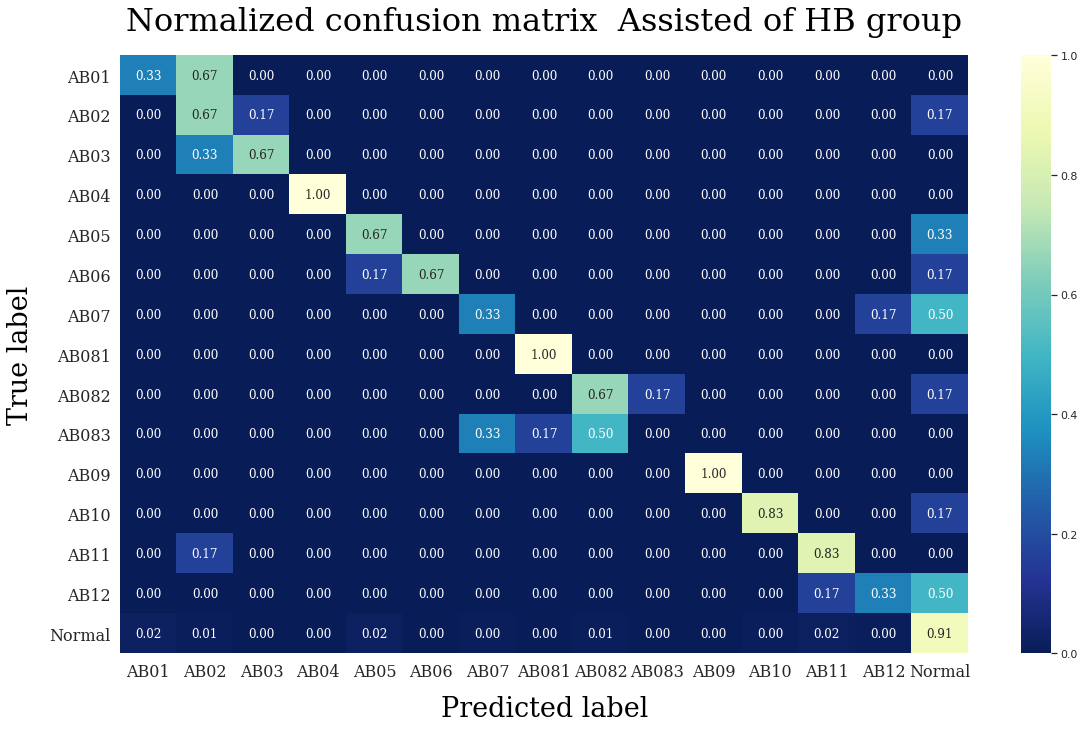

In [27]:
#Assisit tool HB
per = ['U40_Pred_ass','U41_Pred2_ass']
aa = list()
probmore=Exdf
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]
# print(sum(cm.ravel()))
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(10, 7))
# ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix of HB group ',fontsize=18)
# ax.set_ylabel('True label',fontsize=14)
# ax.set_xlabel('Predicted label',fontsize=14)

group = 'Assisted of HB group'
confusion_matrix_normalized(cm,group)

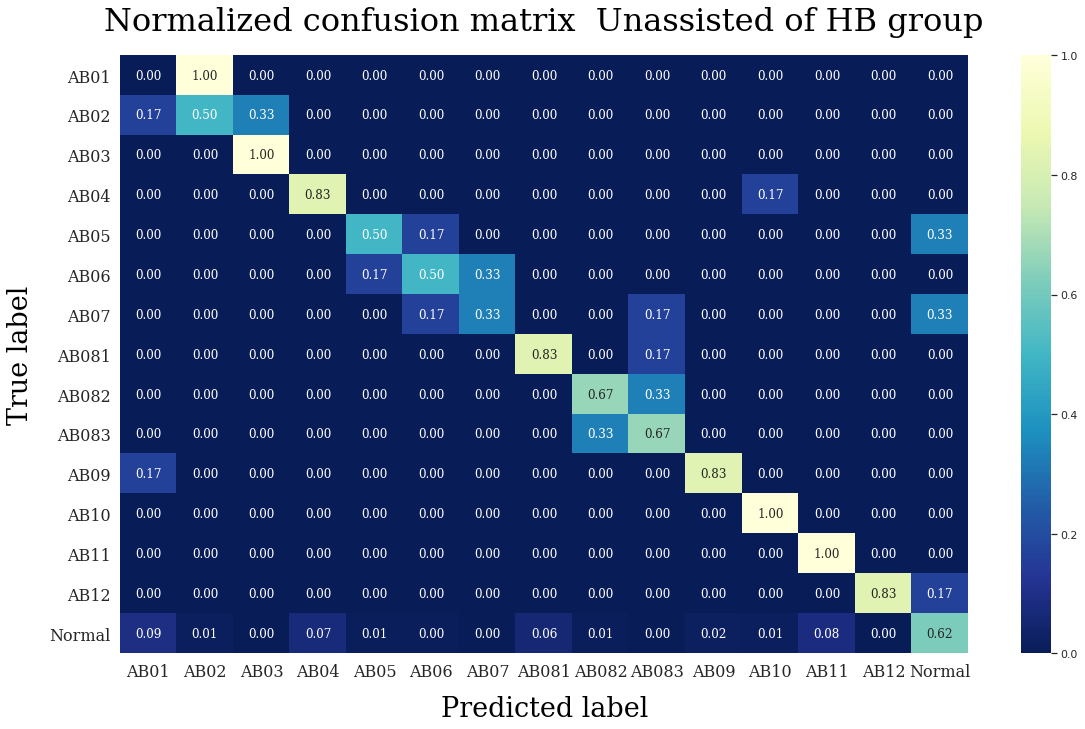

In [28]:
#Unassisit tool HB
per = ['U40_Pred2', 'U41_Pred']
aa = list()
probmore=Exdf
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act= probmore['Sub_class_New'].array
    pred = probmore[j].array
    labels = ['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal']
    a = confusion_matrix(act, pred,labels)
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'Person':j,'Con':a,'acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

cm = df1.Con[0]+df1.Con[1]
# print(sum(cm.ravel()))
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(10, 7))
# ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix of HB group ',fontsize=18)
# ax.set_ylabel('True label',fontsize=14)
# ax.set_xlabel('Predicted label',fontsize=14)

group = 'Unassisted of HB group'
confusion_matrix_normalized(cm,group)

## กราฟเเยกตามความยากง่ายของคุณหมอ


In [ ]:
import pandas as pd
Exdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Experiment2_AI.csv')
Exdf.head(3)

,Unnamed: 0,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,Class,Case,Abs Position,Sub_class,Path Full,fold,AI_Pred,U10_Pred,U11_Pred,tagName0,Sub_class_New,Top3_category,Top3_Prob,category,Prob,FP_category,U31_Pred_ass,U30_Pred,U41_Pred,U21_Pred,U40_Pred_ass,U20_Pred_ass,U10_Pred2_ass,U11_Pred2,U30_Pred2_ass,U41_Pred2_ass,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2_ass,B10_Pred1,B11_Pred1_ass,B12_Pred1_ass,B10_Pred2_ass,B11_Pred2,B12_Pred2
0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,100,P1,P1,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,2,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'AB082']","[0.5297411700821869, 0.20299334374021513, 0.07...",AB02,0.529741,FP-A,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,50,P4,P42,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'Normal']","[0.5384400113893146, 0.23439530764208472, 0.03...",AB02,0.538440,FP-B,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02,AB01,AB01,AB02,AB02,AB01,Normal
2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,4,P5,P52,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB01,AB03,AB02,Easy,AB01,"['AB01', 'Normal', 'AB082']","[0.8420314338368775, 0.03463969852508276, 0.02...",AB01,0.842031,FP-C,AB01,AB02,AB02,AB02,AB01,AB01,AB01,AB02,AB01,AB02,AB02,AB02,AB01,AB01,AB11,AB02,AB01,AB01,AB02,Normal


In [ ]:
Easy = Exdf[Exdf['tagName0'] == 'Easy']
Hard = Exdf[Exdf['tagName0'] == 'Hard']
diff = Exdf[Exdf['tagName0'] == 'different']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend
from pylab import axis

In [ ]:
def plot_graph_kie(ass,non,group,score):
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal'}
    if group =='Hard case':
        color1 = '#FCA4A4'
        color2 = '#ED1515'
    elif group =='Easy case':
        color1 = '#78E46D'
        color2 = '#269C1A'
    else:
        color1 = '#AAAAAA'
        color2 = '#4C4C4C'

    fig, ax = plt.subplots(figsize=(10, 5))
    X = [[0,0],[0.5,0.5],[1,1],[1.5,1.5]]
    Y=[]
    for i in range(len(ass)):
        a = [ass[i],non[i]]
        Y.append(a)

    plt.ylim(0.,1) 
    x = np.arange(0,2,0.5)  

    for i in range(len(X)):
        plt.plot(X[i], Y[i] , color=color1,  linestyle='-', linewidth=3)
    plt.plot(x, non, color=color1,  linestyle=' ', marker='o', markeredgecolor=color1, markersize=9, label='Unassisted')
    plt.plot(x, ass, color=color2,  linestyle=' ', marker='D', markeredgecolor=color2, markersize=8, label='Assisted')

    # legend(['Unassisted', 'Assisted'], bbox_to_anchor=(1.17,1.))
    plt.title(f'Assisted vs Unassisted Diagnosis of {group}',fontsize=18, fontdict=font, pad=15) 
    plt.xlabel('Groups of participants based on experience',fontsize=16, fontdict=font,  labelpad=15)
    plt.ylabel(f'Average {score}',fontsize=16, fontdict=font,  labelpad=15)
    ax.set_xticks(x)
    labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
    ax.set_xticklabels(labels,fontsize=12, fontdict=font)
    plt.legend(loc='lower right')
    plt.grid(True)
    return ax

## Acc.

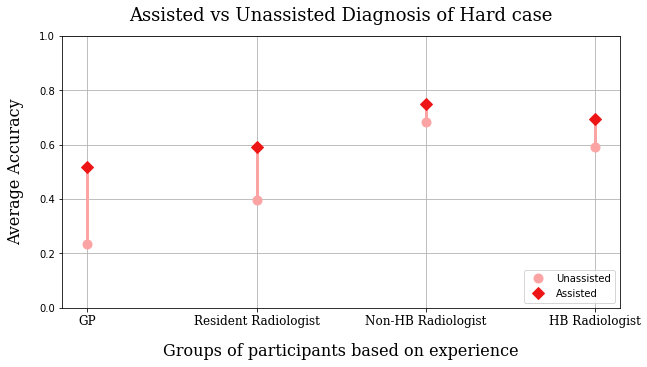

In [ ]:
ass = [0.518182,0.590909,0.750000,0.693182]
non = [0.236364,0.397727,0.681818,0.590909]
group = 'Hard case'
score = 'Accuracy'
plot_graph_kie(ass,non,group,score)

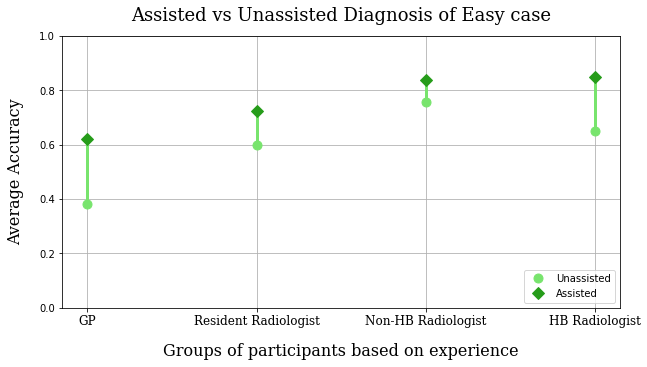

In [ ]:
ass = [0.621429,0.723214,0.839286,0.848214]
non = [0.382143,0.598214,0.758929,0.651786]
group = 'Easy case'
score = 'Accuracy'
plot_graph_kie(ass,non,group,score)

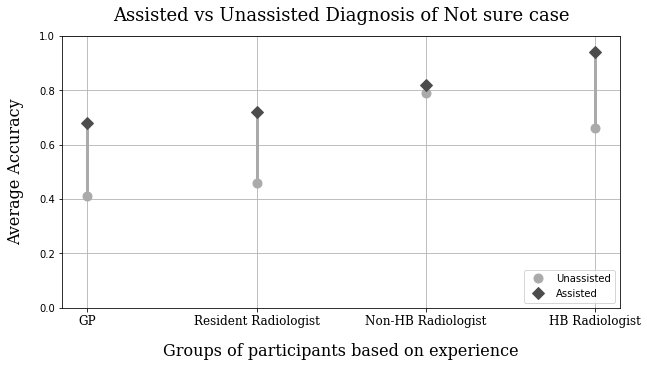

In [ ]:
ass = [0.68,0.720000,0.820000,0.940000]
non = [0.412000,0.460000,0.790000,0.660000]
group = 'Not sure case'
score = 'Accuracy'
plot_graph_kie(ass,non,group,score)

## Prec.

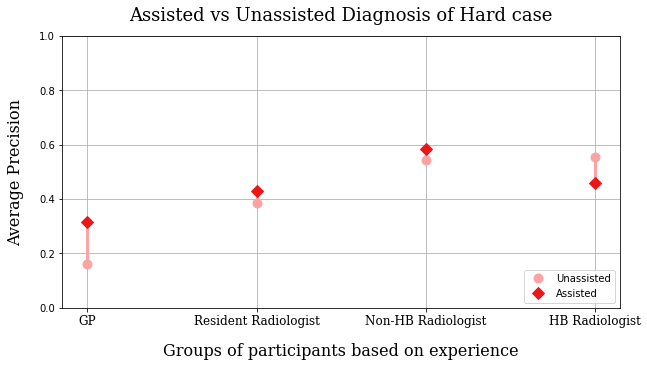

In [ ]:
ass = [0.314,0.43,0.585,0.46]
non = [0.160,0.385,0.545,0.555]
group = 'Hard case'
score = 'Precision'
plot_graph_kie(ass,non,group,score)

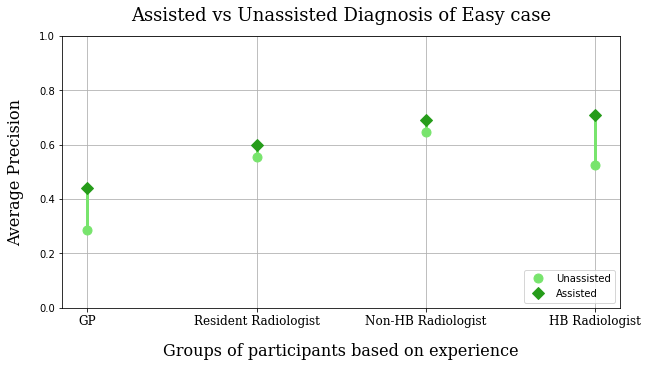

In [ ]:
ass = [0.442,0.60,0.690,0.71]
non = [0.286,0.555,0.645,0.525]
group = 'Easy case'
score = 'Precision'
plot_graph_kie(ass,non,group,score)

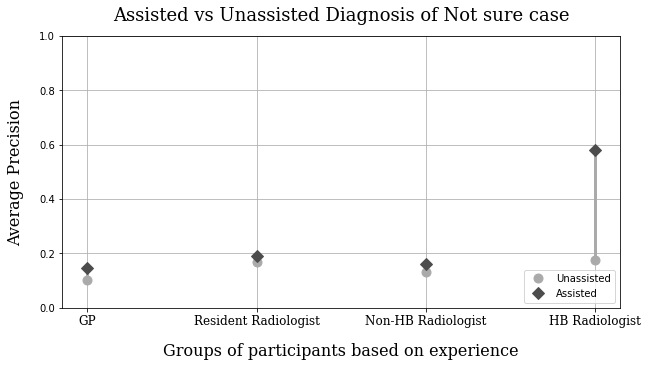

In [ ]:
ass = [0.148,0.19,0.160,0.58]
non = [0.104,0.170,0.130,0.175]
group = 'Not sure case'
score = 'Precision'
plot_graph_kie(ass,non,group,score)

## Recall

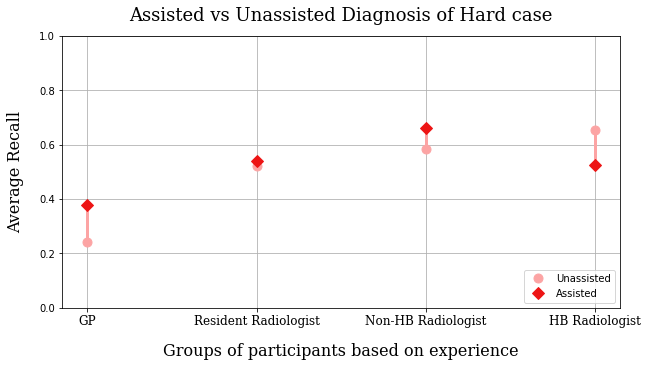

In [ ]:
ass = [0.378,0.540,0.660,0.525]
non = [0.242,0.520,0.585,0.655]
group = 'Hard case'
score = 'Recall'
plot_graph_kie(ass,non,group,score)

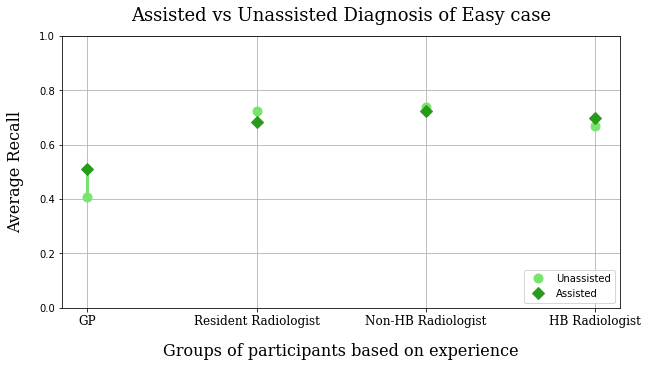

In [ ]:
ass = [0.512,0.685,0.725,0.700]
non = [0.408,0.725,0.740,0.670]
group = 'Easy case'
score = 'Recall'
plot_graph_kie(ass,non,group,score)

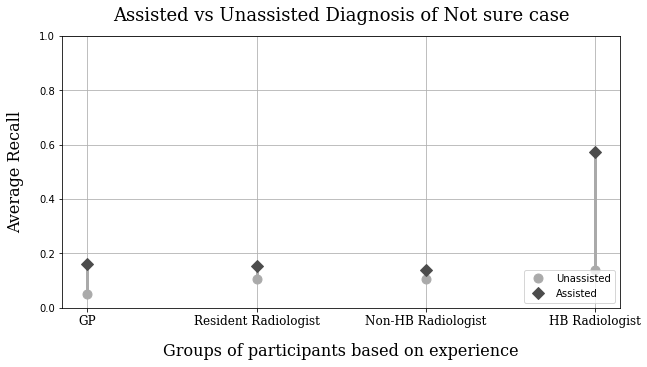

In [ ]:
ass = [0.160,0.155,0.140,0.575]
non = [0.050,0.105,0.105,0.140]
group = 'Not sure case'
score = 'Recall'
plot_graph_kie(ass,non,group,score)

### Assisted tool:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
AssistGP5 =['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U10_Pred2_ass','U11_Pred','U20_Pred_ass','U21_Pred2_ass','U30_Pred2_ass','U31_Pred_ass','U40_Pred_ass','U41_Pred2_ass']

In [ ]:
per = AssistGP5
aa = list()
probmore=Easy
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act = probmore['Sub_class_New'].array
    pred = probmore[j].array
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'per':j,'tagName':'Easy','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

aa = list()
probmore=Hard
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    act = probmore['Sub_class_New'].array
    pred = probmore[j].array
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'per':j,'tagName':'Hard','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df2 = pd.DataFrame(aa)

aa = list()
probmore=diff
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    act = probmore['Sub_class_New'].array
    pred = probmore[j].array
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'per':j,'tagName':'Different','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df3 = pd.DataFrame(aa)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
result= pd.concat([df1, df2,df3], ignore_index=True)
result

,per,tagName,acc,Prec,Recall,count
0,B10_Pred2_ass,Easy,0.642857,0.44,0.47,56
1,B11_Pred1_ass,Easy,0.500000,0.25,0.36,56
2,B12_Pred1_ass,Easy,0.535714,0.46,0.49,56
3,U10_Pred2_ass,Easy,0.660714,0.47,0.54,56
4,U11_Pred,Easy,0.767857,0.59,0.70,56
5,U20_Pred_ass,Easy,0.696429,0.69,0.78,56
6,U21_Pred2_ass,Easy,0.750000,0.51,0.59,56
7,U30_Pred2_ass,Easy,0.821429,0.67,0.73,56
8,U31_Pred_ass,Easy,0.857143,0.71,0.72,56
9,U40_Pred_ass,Easy,0.857143,0.70,0.72,56


In [ ]:
result["Prec"] = pd.to_numeric(result["Prec"])
result["Recall"] = pd.to_numeric(result["Recall"])

In [ ]:
AssistGP5

['B10_Pred2_ass',
 'B11_Pred1_ass',
 'B12_Pred1_ass',
 'U10_Pred2_ass',
 'U11_Pred',
 'U20_Pred_ass',
 'U21_Pred2_ass',
 'U30_Pred2_ass',
 'U31_Pred_ass',
 'U40_Pred_ass',
 'U41_Pred2_ass']

In [ ]:
GP = result[(result['per']=='B10_Pred2_ass' )|(result['per']=='B11_Pred1_ass')|(result['per']=='B12_Pred1_ass')|(result['per']=='U10_Pred2_ass')|(result['per']=='U11_Pred')]
GP.groupby('tagName').mean()

,acc,Prec,Recall,count
tagName,,,,
Different,0.680000,0.148,0.160,50
Easy,0.621429,0.442,0.512,56
Hard,0.518182,0.314,0.378,44


In [ ]:

res = result[(result['per']=='U20_Pred_ass' )|(result['per']=='U21_Pred2_ass')]
res.groupby('tagName').mean()

,acc,Prec,Recall,count
tagName,,,,
Different,0.720000,0.19,0.155,50
Easy,0.723214,0.60,0.685,56
Hard,0.590909,0.43,0.540,44


In [ ]:
nonHB = result[(result['per']=='U30_Pred2_ass' )|(result['per']=='U31_Pred_ass')]
nonHB.groupby('tagName').mean()

,acc,Prec,Recall,count
tagName,,,,
Different,0.820000,0.160,0.140,50
Easy,0.839286,0.690,0.725,56
Hard,0.750000,0.585,0.660,44


In [ ]:
HB = result[(result['per']=='U40_Pred_ass' )|(result['per']=='U41_Pred2_ass')]
HB.groupby('tagName').mean()

,acc,Prec,Recall,count
tagName,,,,
Different,0.940000,0.58,0.575,50
Easy,0.848214,0.71,0.700,56
Hard,0.693182,0.46,0.525,44


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend
from pylab import axis

#### - Acc.

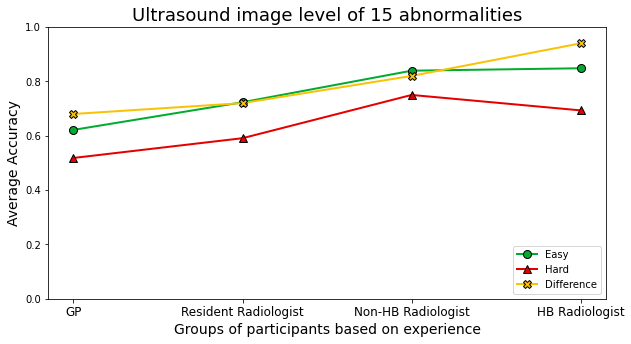

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

H = [0.518182,0.590909,0.750000,0.693182]
E = [0.621429,0.723214,0.839286,0.848214]
D = [0.68,0.720000,0.820000,0.940000]

plt.ylim(0.,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, E, color='#02ab2e', linestyle='-', linewidth = 2, marker='o', markeredgecolor='black', markersize=8, label = 'Easy')
plt.plot(x, H, color='#e50000', linestyle='-', linewidth = 2, marker='^', markeredgecolor='black', markersize=8, label = 'Hard')
plt.plot(x, D, color='#fac205', linestyle='-', linewidth = 2, marker='X', markeredgecolor='black', markersize=8, label = 'Difference')

# plt.title('The difference of Before and After(Abn&Nor)',fontsize=20) 
plt.title('Ultrasound image level of 15 abnormalities',fontsize=18) 
plt.xlabel('Groups of participants based on experience',fontsize=14)
plt.ylabel('Average Accuracy',fontsize=14)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12)
plt.legend(loc='lower right')

show()

#### - Prec.

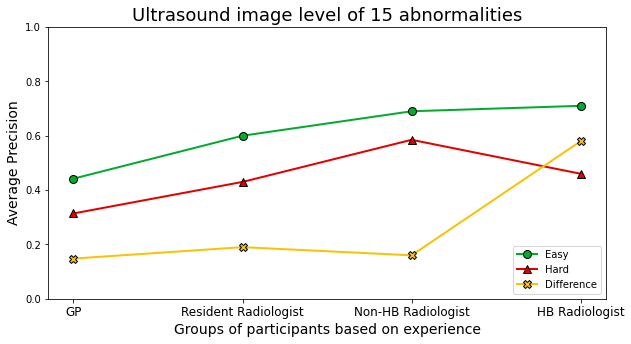

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

H = [0.314,0.43,0.585,0.46]
E = [0.442,0.60,0.690,0.71]
D = [0.148,0.19,0.160,0.58]

plt.ylim(0.,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, E, color='#02ab2e', linestyle='-', linewidth = 2, marker='o', markeredgecolor='black', markersize=8, label = 'Easy')
plt.plot(x, H, color='#e50000', linestyle='-', linewidth = 2, marker='^', markeredgecolor='black', markersize=8, label = 'Hard')
plt.plot(x, D, color='#fac205', linestyle='-', linewidth = 2, marker='X', markeredgecolor='black', markersize=8, label = 'Difference')

# plt.title('The difference of Before and After(Abn&Nor)',fontsize=20) 
plt.title('Ultrasound image level of 15 abnormalities',fontsize=18) 
plt.xlabel('Groups of participants based on experience',fontsize=14)
plt.ylabel('Average Precision',fontsize=14)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12)
plt.legend(loc='lower right')

show()

#### - Recall.

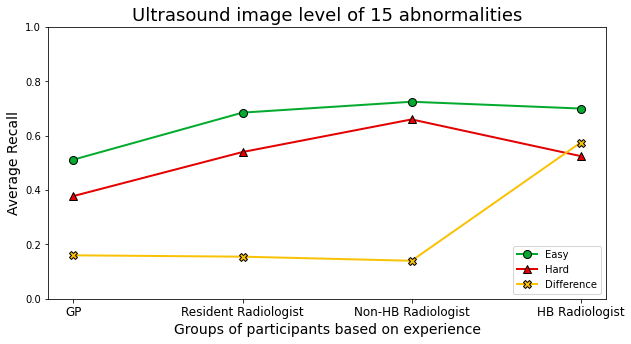

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

H = [0.378,0.540,0.660,0.525]
E = [0.512,0.685,0.725,0.700]
D = [0.160,0.155,0.140,0.575]

plt.ylim(0.,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, E, color='#02ab2e', linestyle='-', linewidth = 2, marker='o', markeredgecolor='black', markersize=8, label = 'Easy')
plt.plot(x, H, color='#e50000', linestyle='-', linewidth = 2, marker='^', markeredgecolor='black', markersize=8, label = 'Hard')
plt.plot(x, D, color='#fac205', linestyle='-', linewidth = 2, marker='X', markeredgecolor='black', markersize=8, label = 'Difference')

# plt.title('The difference of Before and After(Abn&Nor)',fontsize=20) 
plt.title('Ultrasound image level of 15 abnormalities',fontsize=18) 
plt.xlabel('Groups of participants based on experience',fontsize=14)
plt.ylabel('Average Recall',fontsize=14)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12)
plt.legend(loc='lower right')

show()

### Unassisted tool:

In [ ]:
GP5 =['B10_Pred1','B11_Pred2','B12_Pred2','U10_Pred','U11_Pred2','U20_Pred2','U21_Pred','U30_Pred','U31_Pred2','U40_Pred2','U41_Pred']

In [ ]:
per = GP5
aa = list()
probmore=Easy
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report,confusion_matrix
    act = probmore['Sub_class_New'].array
    pred = probmore[j].array
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'per':j,'tagName':'Easy','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df1 = pd.DataFrame(aa)

aa = list()
probmore=Hard
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    act = probmore['Sub_class_New'].array
    pred = probmore[j].array
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'per':j,'tagName':'Hard','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df2 = pd.DataFrame(aa)

aa = list()
probmore=diff
for j in per:
    import numpy as np
    from sklearn.metrics import confusion_matrix
    act = probmore['Sub_class_New'].array
    pred = probmore[j].array
    cmat = confusion_matrix(act, pred)
    acc = (np.trace(cmat))/(np.sum(cmat))
    Recall = classification_report(act, pred).split()[-9]
    Prec = classification_report(act, pred).split()[-10] 
    aa.append({'per':j,'tagName':'Different','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)})
df3 = pd.DataFrame(aa)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
result= pd.concat([df1, df2,df3], ignore_index=True)
result["Prec"] = pd.to_numeric(result["Prec"])
result["Recall"] = pd.to_numeric(result["Recall"])

In [ ]:
GP = result[(result['per']=='B10_Pred1' )|(result['per']=='B11_Pred2')|(result['per']=='B12_Pred2')|(result['per']=='U10_Pred')|(result['per']=='U11_Pred2')]
GP.groupby('tagName').mean()

,acc,Prec,Recall,count
tagName,,,,
Different,0.412000,0.104,0.050,50
Easy,0.382143,0.286,0.408,56
Hard,0.236364,0.160,0.242,44


In [ ]:
res = result[(result['per']=='U20_Pred2' )|(result['per']=='U21_Pred')]
res.groupby('tagName').mean()

,acc,Prec,Recall,count
tagName,,,,
Different,0.460000,0.170,0.105,50
Easy,0.598214,0.555,0.725,56
Hard,0.397727,0.385,0.520,44


In [ ]:
nonHB = result[(result['per']=='U30_Pred' )|(result['per']=='U31_Pred2')]
nonHB.groupby('tagName').mean()

,acc,Prec,Recall,count
tagName,,,,
Different,0.790000,0.130,0.105,50
Easy,0.758929,0.645,0.740,56
Hard,0.681818,0.545,0.585,44


In [ ]:
HB = result[(result['per']=='U40_Pred2' )|(result['per']=='U41_Pred')]
HB.groupby('tagName').mean()

,acc,Prec,Recall,count
tagName,,,,
Different,0.660000,0.175,0.140,50
Easy,0.651786,0.525,0.670,56
Hard,0.590909,0.555,0.655,44


#### - Acc.

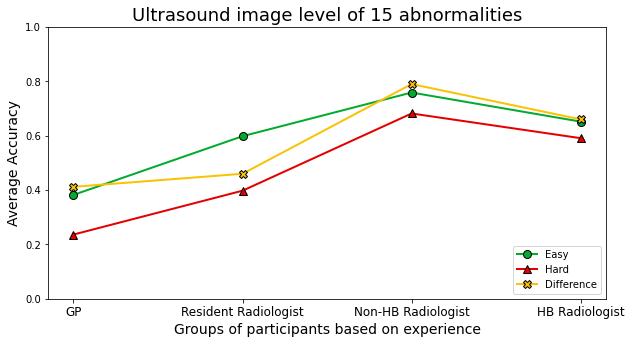

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

H = [0.236364,0.397727,0.681818,0.590909]
E = [0.382143,0.598214,0.758929,0.651786]
D = [0.412000,0.460000,0.790000,0.660000]

plt.ylim(0.,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, E, color='#02ab2e', linestyle='-', linewidth = 2, marker='o', markeredgecolor='black', markersize=8, label = 'Easy')
plt.plot(x, H, color='#e50000', linestyle='-', linewidth = 2, marker='^', markeredgecolor='black', markersize=8, label = 'Hard')
plt.plot(x, D, color='#fac205', linestyle='-', linewidth = 2, marker='X', markeredgecolor='black', markersize=8, label = 'Difference')

# plt.title('The difference of Before and After(Abn&Nor)',fontsize=20) 
plt.title('Ultrasound image level of 15 abnormalities',fontsize=18) 
plt.xlabel('Groups of participants based on experience',fontsize=14)
plt.ylabel('Average Accuracy',fontsize=14)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12)
plt.legend(loc='lower right')

show()

#### - Prec.

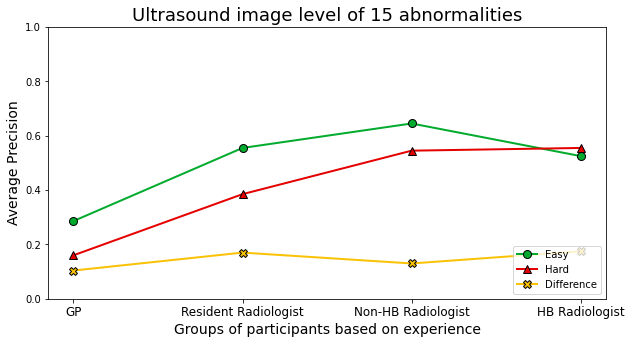

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

H = [0.160,0.385,0.545,0.555]
E = [0.286,0.555,0.645,0.525]
D = [0.104,0.170,0.130,0.175]

plt.ylim(0.,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, E, color='#02ab2e', linestyle='-', linewidth = 2, marker='o', markeredgecolor='black', markersize=8, label = 'Easy')
plt.plot(x, H, color='#e50000', linestyle='-', linewidth = 2, marker='^', markeredgecolor='black', markersize=8, label = 'Hard')
plt.plot(x, D, color='#fac205', linestyle='-', linewidth = 2, marker='X', markeredgecolor='black', markersize=8, label = 'Difference')

# plt.title('The difference of Before and After(Abn&Nor)',fontsize=20) 
plt.title('Ultrasound image level of 15 abnormalities',fontsize=18) 
plt.xlabel('Groups of participants based on experience',fontsize=14)
plt.ylabel('Average Precision',fontsize=14)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12)
plt.legend(loc='lower right')

show()

#### - Recall.

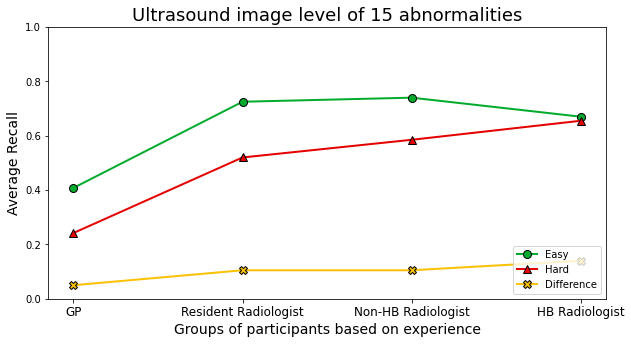

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

H = [0.242,0.520,0.585,0.655]
E = [0.408,0.725,0.740,0.670]
D = [0.050,0.105,0.105,0.140]

plt.ylim(0.,1) 
x = np.arange(0,2,0.5)  # the label locations

# plt.plot(x, y, 'g-', label='Assist')
plt.plot(x, E, color='#02ab2e', linestyle='-', linewidth = 2, marker='o', markeredgecolor='black', markersize=8, label = 'Easy')
plt.plot(x, H, color='#e50000', linestyle='-', linewidth = 2, marker='^', markeredgecolor='black', markersize=8, label = 'Hard')
plt.plot(x, D, color='#fac205', linestyle='-', linewidth = 2, marker='X', markeredgecolor='black', markersize=8, label = 'Difference')

# plt.title('The difference of Before and After(Abn&Nor)',fontsize=20) 
plt.title('Ultrasound image level of 15 abnormalities',fontsize=18) 
plt.xlabel('Groups of participants based on experience',fontsize=14)
plt.ylabel('Average Recall',fontsize=14)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12)
plt.legend(loc='lower right')

show()